# Support Vector Machine - Extended Data Set

- Looking at the Learning curves for SVM on 240 30 seconds and 480 15 second clips , looked like cv accuracy was going up with data set size, suggests more DATA will help the model to generalize better

- DATA SOURCE : KAGGLE [MusicNet Midi FILES](https://www.kaggle.com/datasets/rohitsingh0210/musicnet-midi-files?select=musicnet_midis)

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline

In [2]:
# ADDITIONAL DATA SET: 

data_dir = './DataStreamFeatures/DataFrames/'

df_best_features = pd.read_csv(data_dir + 'BestMusicFeatures_15seconds_MusicNet_Kaggle_313.csv')

df_best_features.head()

,Range,PitchVariety,NumberOfCommonPitches,NoteDensity,AmountOfArpeggiation,IntervalBetweenStrongestPitches,MostCommonPitchClassPrevalence,MostCommonPitchPrevalence,RelativeStrengthOfTopPitchClasses,RepeatedNotes,MelodicOctaves,SizeOfMelodicArcs,VariabilityOfNoteDuration,MelodicTritones,PitchClassVariety,Composer_name,Composer_label
0,39.0,30.0,3.0,13.7500,0.221198,2.0,0.145455,0.104545,0.968750,0.013825,0.004608,5.340206,0.171883,0.018433,11.0,Bach,0.0
1,39.0,32.0,0.0,13.3125,0.214286,17.0,0.173709,0.079812,0.945946,0.009524,0.004762,5.764045,0.136698,0.004762,11.0,Bach,0.0
2,39.0,30.0,3.0,13.7500,0.221198,2.0,0.145455,0.104545,0.968750,0.013825,0.004608,5.340206,0.171883,0.018433,11.0,Bach,0.0
3,36.0,27.0,0.0,13.6875,0.189815,1.0,0.164384,0.086758,0.972222,0.009259,0.009259,5.069307,0.176578,0.004630,10.0,Bach,0.0
4,39.0,32.0,0.0,13.4375,0.231132,17.0,0.176744,0.079070,0.921053,0.009434,0.004717,5.684211,0.141548,0.014151,11.0,Bach,0.0


In [3]:
data_dir = './DataStreamFeatures/DataFrames/'

df_best_features = pd.concat([pd.read_csv(data_dir + 'BestMusicFeatures_15seconds.csv'),df_best_features])

df_best_features.head()

,Range,PitchVariety,NumberOfCommonPitches,NoteDensity,AmountOfArpeggiation,IntervalBetweenStrongestPitches,MostCommonPitchClassPrevalence,MostCommonPitchPrevalence,RelativeStrengthOfTopPitchClasses,RepeatedNotes,MelodicOctaves,SizeOfMelodicArcs,VariabilityOfNoteDuration,MelodicTritones,PitchClassVariety,Composer_name,Composer_label
0,24.0,18.0,3.0,7.238095,0.562500,7.0,0.315789,0.263158,0.777778,0.348214,0.008929,6.216216,0.089537,0.000000,11.0,Bach,0.0
1,22.0,15.0,4.0,5.269841,0.304878,1.0,0.204819,0.144578,0.882353,0.024390,0.048780,8.261905,0.070927,0.012195,8.0,Bach,0.0
2,31.0,21.0,2.0,6.730159,0.432692,7.0,0.264151,0.188679,0.535714,0.096154,0.009615,7.583333,0.091070,0.000000,12.0,Bach,0.0
3,24.0,17.0,2.0,7.365079,0.508772,7.0,0.336207,0.301724,0.717949,0.412281,0.008772,5.437500,0.083497,0.000000,10.0,Bach,0.0
4,24.0,18.0,3.0,7.047619,0.513761,7.0,0.315315,0.252252,0.657143,0.284404,0.009174,6.944444,0.089949,0.000000,11.0,Bach,0.0


In [4]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

793 samples with 15 features each <class 'numpy.ndarray'>


In [5]:
y = df_best_features['Composer_label'].to_numpy()

y.shape

(793,)

# First Trial, take only two features, can then make cool Scatter plots

In [6]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

793 samples with 15 features each <class 'numpy.ndarray'>


In [7]:
print(X.shape)

X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X.shape)

(793, 15)
(793, 2)


Test different kernals some statring parameters

In [8]:
linear = svm.SVC(kernel='linear', C=1000, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=0.1, C=1000, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1000, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1000, decision_function_shape='ovo').fit(X_train, y_train)

In [9]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .05
#create the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

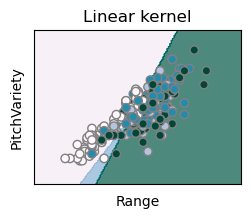

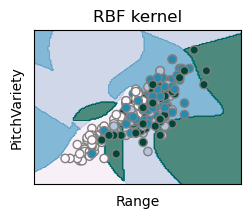

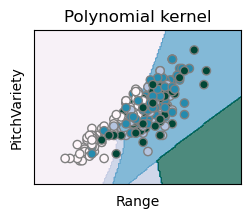

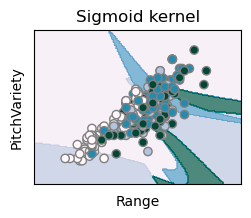

In [10]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_scaled[::3, 0], X_scaled[::3, 1], c=y[::3], cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel(training_features_list[0])
    plt.ylabel(training_features_list[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [11]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.42016806722689076
Accuracy Polynomial Kernel: 0.3949579831932773
Accuracy Radial Basis Kernel: 0.5126050420168067
Accuracy Sigmoid Kernel: 0.36134453781512604


# Try with Full list of Features, same parameters

In [12]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X_scaled.shape)

793 samples with 15 features each <class 'numpy.ndarray'>
(793, 15)


In [13]:
linear_all = svm.SVC(kernel='linear', C=1000, decision_function_shape='ovo').fit(X_train, y_train)
rbf_all = svm.SVC(kernel='rbf', gamma=0.1, C=1000, decision_function_shape='ovo').fit(X_train, y_train)
poly_all = svm.SVC(kernel='poly', degree=3, C=1000, decision_function_shape='ovo').fit(X_train, y_train)
sig_all = svm.SVC(kernel='sigmoid', C=1000, decision_function_shape='ovo').fit(X_train, y_train)

In [14]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin_all = linear_all.score(X_test, y_test)
accuracy_poly_all = poly_all.score(X_test, y_test)
accuracy_rbf_all = rbf_all.score(X_test, y_test)
accuracy_sig_all = sig_all.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin_all)
print('Accuracy Polynomial Kernel:', accuracy_poly_all)
print('Accuracy Radial Basis Kernel:', accuracy_rbf_all)
print('Accuracy Sigmoid Kernel:', accuracy_sig_all)

Accuracy Linear Kernel: 0.5546218487394958
Accuracy Polynomial Kernel: 0.6050420168067226
Accuracy Radial Basis Kernel: 0.7142857142857143
Accuracy Sigmoid Kernel: 0.5042016806722689


# Try Grid Search for Linear and Polynomial Kernels , which seem to work best

- based on grid search example in scikit learn documentation [Grid Search SV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html)

In [15]:
## will use cross validation for the grid search... 

X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))


#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#Scale X and take all X and y

X_scaled = scaler.fit_transform(X)

print(X.shape)

793 samples with 15 features each <class 'numpy.ndarray'>
(793, 15)


In [16]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0,3e0],
                     'C': [100]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [100],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [17]:
results_df = pd.DataFrame(search.cv_results_)

results_df['C']=[p['C'] for p in results_df['params'].values]
results_df['log_10[C]']=[np.log10(p['C']) for p in results_df['params'].values]

results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
100_0.2_rbf,"{'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}",1,0.728388,0.023317
100_0.3_rbf,"{'C': 100, 'gamma': 0.3, 'kernel': 'rbf'}",2,0.724867,0.023659
100_0.03_rbf,"{'C': 100, 'gamma': 0.03, 'kernel': 'rbf'}",3,0.724600,0.024758
100_0.1_rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",4,0.723358,0.028158
100_0.07_rbf,"{'C': 100, 'gamma': 0.07, 'kernel': 'rbf'}",5,0.720591,0.032881
100_0.01_rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",6,0.695867,0.028608
100_0.7_rbf,"{'C': 100, 'gamma': 0.7, 'kernel': 'rbf'}",7,0.675171,0.027752
100_0.003_rbf,"{'C': 100, 'gamma': 0.003, 'kernel': 'rbf'}",8,0.670873,0.014806
100_0.001_rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",9,0.625460,0.020713


<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

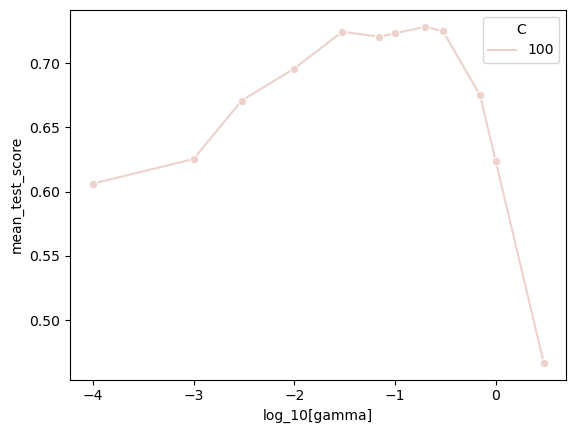

In [18]:
results_df = pd.DataFrame(search.cv_results_)

results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

results_df['C']=[p['C'] for p in results_df['params'].values]

results_df = results_df.sort_values(by=["log_10[gamma]"])

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')
#results_df.plot(x='log_10[gamma]',y='mean_test_score',color='C',marker='o')

In [19]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0],
                     'C': [1000]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_C2 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_C2.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [1000],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0],
                          'kernel': ['rbf']}])

In [20]:
results_df_C2 = pd.DataFrame(search_C2.cv_results_)

results_df_C2['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_C2['params'].values]

results_df_C2['C']=[p['C'] for p in results_df_C2['params'].values]

results_df = pd.concat([results_df,results_df_C2])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

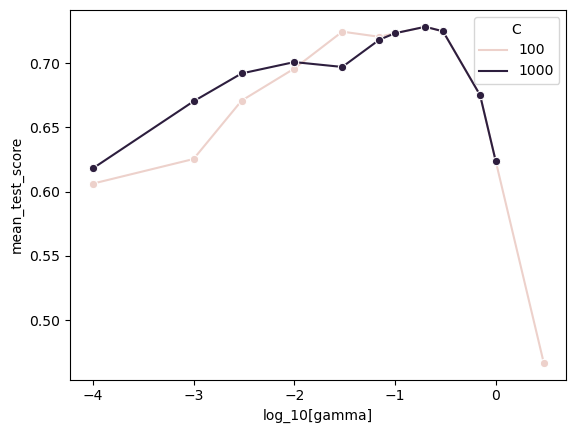

In [21]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [22]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1],
                     'C': [1e4]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_C3 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_C3.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [10000.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7],
                          'kernel': ['rbf']}])

In [23]:
results_df_C3 = pd.DataFrame(search_C3.cv_results_)

results_df_C3['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_C3['params'].values]

results_df_C3['C']=[p['C'] for p in results_df_C3['params'].values]

results_df = pd.concat([results_df,results_df_C3])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

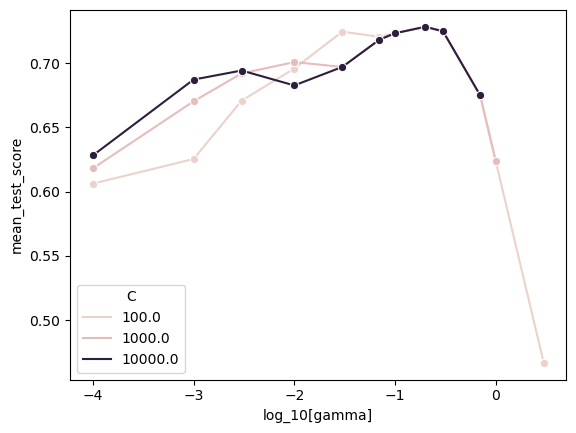

In [24]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [25]:
# View the accuracy score
print('Best score for training data:', search.best_score_,"\n") 

# View the best parameters for the model found using grid search

Best_C = search_C2.best_estimator_.C

Best_GAMMA = search_C2.best_estimator_.gamma

print('Best C:',Best_C,"\n") 

print('Best Gamma:',Best_GAMMA,"\n")

final_model = search_C2.best_estimator_

Best score for training data: 0.7283878672080247 

Best C: 1000 

Best Gamma: 0.2 



In [26]:
from sklearn.model_selection import learning_curve

svm_best_params = svm.SVC(kernel='rbf', gamma=Best_GAMMA, C=Best_C, decision_function_shape='ovo')

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

scaler = StandardScaler()

X = scaler.fit_transform(X)


train_size_abs, train_scores, test_scores = learning_curve(
                                                            svm_best_params, X, y, cv=cv,train_sizes=np.linspace(0.3,1,20)
)


size_list = []

cv_train_list = []

cv_test_list = []

for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores
):
    size_list.append(train_size)
    cv_train_list.append(cv_train_scores.mean())
    cv_test_list.append(cv_test_scores.mean())
    
    
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.5f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.5f}")

190 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.45272
213 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.48828
236 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.52358
260 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.55232
283 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.56216
306 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.56769
330 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.59190
353 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.60451
377 samples were used to train the model
The average train accuracy is 1

<AxesSubplot: >

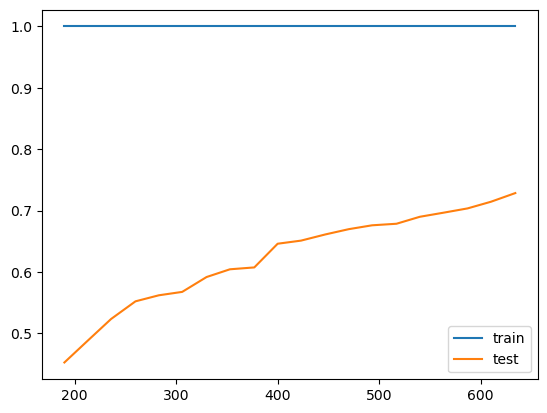

In [27]:
learing_results_df = pd.DataFrame([])

learning_df = pd.DataFrame(list(zip(cv_train_list, cv_test_list)),
               columns =['train','test'],index=size_list)

learning_df.plot()

In [28]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

793 samples with 15 features each <class 'numpy.ndarray'>


In [29]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X_scaled.shape)

793 samples with 15 features each <class 'numpy.ndarray'>
(793, 15)


In [30]:
rbf_BEST_FINAL_MODEL = svm.SVC(kernel='rbf', gamma=Best_GAMMA, C=Best_C, decision_function_shape='ovo',probability=True).fit(X_train, y_train)

In [31]:
TEST_PROBS_DF = pd.DataFrame(rbf_BEST_FINAL_MODEL.predict_proba(X_test),columns=['Bach','Beethoven','Brahms','Schubert'])

<AxesSubplot: >

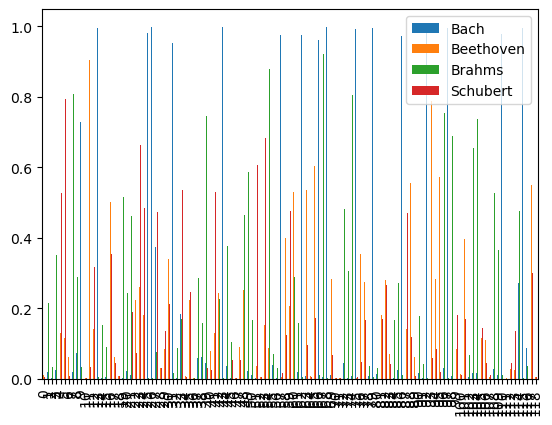

In [37]:
TEST_PROBS_DF.iloc[:,:].plot.bar()

In [33]:
#### Save the Best model, to use on the TEST data set PS2

In [34]:
import pickle

filename = "./Saved_Models/RBF_SVM_C_1000_Gamma_02.pickle"

# save model
pickle.dump(rbf_BEST_FINAL_MODEL, open(filename, "wb"))

# load model
#loaded_model = pickle.load(open(filename, "rb"))

### Confusion Matrix on Test Predictions

In [35]:
y_pred_test = rbf_BEST_FINAL_MODEL.predict(X_test)

<AxesSubplot: >

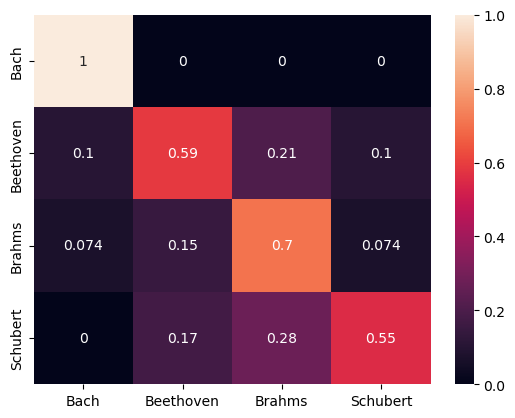

In [36]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

Composers = ['Bach','Beethoven','Brahms','Schubert']

c_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_test,normalize='true'))

c_matrix.index = Composers
c_matrix.columns = Composers

sns.heatmap(data=c_matrix,annot=True)

## Can see that Bach is easiest to classify

* Brahms is the next easiest, also Brahms has second highest probabilities in the plot above 

* 